In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper')

# Topic modeling

In [ ]:
import string
BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

def simple_preproc(text):
  return text.translate(str.maketrans('', '', string.punctuation))

with open(BASE_PATH + 'text_news_nne/text_news_1996.txt') as read_file:
  sentences1996 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_1997.txt') as read_file:
  sentences1997 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_1998.txt') as read_file:
  sentences1998 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_1999.txt') as read_file:
  sentences1999 = [simple_preproc(k).lower().split() for k in read_file.readlines()]
with open(BASE_PATH + 'text_news_nne/text_news_2000.txt') as read_file:
  sentences2000 = [simple_preproc(k).lower().split() for k in read_file.readlines()]

sentences9600 = sentences1996 + sentences1997 + sentences1998 + sentences1999 + sentences2000

In [ ]:
# deleted <p> that indicate the start of a paragraph

for i in (range(len(sentences9600))):
  count = sentences9600[i].count('p')
  if(count > 0):
    for j in range(count):
      sentences9600[i].remove('p')
      # print(i)
  else:
    sentences9600[i]

# deleted s

for i in (range(len(sentences9600))):
  count = sentences9600[i].count('s')
  if(count > 0):
    for j in range(count):
      sentences9600[i].remove('s')
      # print(i)
  else:
    sentences9600[i]


# deleted 's

for i in (range(len(sentences9600))):
  count = sentences9600[i].count('\'s')
  if(count > 0):
    for j in range(count):
      sentences9600[i].remove('\'s')
      # print(i)
  else:
    sentences9600[i]

In [ ]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = set(sp.Defaults.stop_words)
stop_word = sentences9600.copy()
important_words = stop_word.copy()
for i in (range(len(stop_word))):
  stop_word[i] = [i for i in sentences9600[i] if str(i).lower() not in all_stopwords]
  important_words[i] = [i for i in stop_word[i] if i.isalpha()]

In [ ]:
# create a new list called my_new_list
my_new_list = []
# iterate over the outer list
for sub_list in important_words:
# go over each item of the sublist
    for item in sub_list:
# append it to our new list
        my_new_list.append(item)


lista_vuota = ['1']
nuova_lista = []
nuova_lista.append(lista_vuota)
nuova_lista.append(my_new_list)

In [ ]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(nuova_lista)

# Create Corpus
texts = nuova_lista.copy()

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

In [ ]:
from pprint import pprint
import gensim

# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics(num_words=10))
doc_lda = lda_model[corpus]

[(0,
  '0.009*"nt" + 0.009*"said" + 0.004*"says" + 0.004*"people" + 0.004*"new" + '
  '0.003*"like" + 0.003*"years" + 0.003*"year" + 0.002*"city" + 0.002*"mr"'),
 (1,
  '0.010*"said" + 0.005*"nt" + 0.004*"new" + 0.004*"says" + 0.004*"time" + '
  '0.003*"year" + 0.003*"people" + 0.003*"years" + 0.002*"like" + '
  '0.002*"going"'),
 (2,
  '0.009*"said" + 0.007*"nt" + 0.005*"new" + 0.004*"says" + 0.003*"years" + '
  '0.003*"year" + 0.003*"time" + 0.003*"people" + 0.003*"like" + '
  '0.002*"school"'),
 (3,
  '0.009*"said" + 0.006*"nt" + 0.004*"new" + 0.004*"says" + 0.004*"year" + '
  '0.003*"time" + 0.003*"like" + 0.003*"people" + 0.003*"years" + 0.002*"mr"'),
 (4,
  '0.009*"said" + 0.008*"nt" + 0.005*"says" + 0.004*"new" + 0.003*"like" + '
  '0.003*"time" + 0.003*"people" + 0.003*"year" + 0.002*"years" + '
  '0.002*"percent"'),
 (5,
  '0.010*"said" + 0.006*"nt" + 0.004*"people" + 0.004*"new" + 0.004*"years" + '
  '0.003*"says" + 0.003*"like" + 0.003*"year" + 0.002*"time" + 0.002*"state"')

# PRE-PROCESSING

## Selection of articles that contain at least one keyword

In [ ]:
!pip install -U word_forms

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from word_forms.word_forms import get_word_forms
import nltk
nltk.download('omw-1.4')

# generate all possible forms of keywords
# keyword_list = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'attack', 'hijack', 'firefighter', 'airplane', 'terrorism', 'afghanistan', 'jihad', 'islam']
word_form_tower = get_word_forms("tower")
word_form_attack = get_word_forms("attack")
word_form_hijack = get_word_forms("hijack")
word_form_firefighter = get_word_forms("firefighter")
word_form_airplane = get_word_forms("airplane")
word_form_terrorism = get_word_forms("terrorism")


word_form_tot = (list(list(word_form_tower['a']) + list(word_form_tower['n']) + 
list(word_form_tower['v']) + list(word_form_tower['r']) + 
list(word_form_attack['a']) + list(word_form_attack['n']) + 
list(word_form_attack['v']) + list(word_form_attack['r']) + 
list(word_form_airplane['a']) + list(word_form_airplane['n']) + 
list(word_form_airplane['v']) + list(word_form_airplane['r']) + 
list(word_form_hijack['a']) + list(word_form_hijack['n']) + 
list(word_form_hijack['v']) + list(word_form_hijack['r']) + 
list(word_form_firefighter['a']) + list(word_form_firefighter['n']) + 
list(word_form_firefighter['v']) + list(word_form_firefighter['r']) + 
list(word_form_terrorism['a']) + list(word_form_terrorism['n']) + 
list(word_form_terrorism['v']) + list(word_form_terrorism['r'])))

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
# word_form_tot

In [ ]:
# import string
import re

BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'


with open(BASE_PATH + 'text_news_nne/text_news_1996.txt') as read_file1:
  sentences1996 = read_file1.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_1997.txt') as read_file2:
  sentences1997 = read_file2.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_1998.txt') as read_file3:
  sentences1998 = read_file3.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_1999.txt') as read_file4:
  sentences1999 = read_file4.readlines()
with open(BASE_PATH + 'text_news_nne/text_news_2000.txt') as read_file5:
  sentences2000 = read_file5.readlines()

sentences9600 = sentences1996 + sentences1997 + sentences1998 + sentences1999 + sentences2000

  
#define the list of words of our interest
keywords = ['bin laden', 'al qaeda', 'twin towers', 'world trade center', 'afghanistan', 'jihad', 'islam'] #aggiungere twin towers

keyword_list = keywords + word_form_tot

#define the dictionary where we store the articles
articles = {}
art = {}
#remove the p that represent in html the start of the paragraph
for symbol in sentences9600:
  symbol = symbol.replace('<p>', '')
  #selection of articles that contain the keywords
  for keyword in keyword_list:
    if (keyword in symbol.lower()):
      #select id of the article that contains at least one kwyword 
      id = re.findall(r'@@(\w+)', symbol)[0]
      articles[id] = symbol.lower()
      art[id] = symbol.lower()

print(len(articles))



7513


In [ ]:
#check if list of articles contains duplicates by their id

def check_duplicate(l):
    mySet = set(l)
    if len(mySet) == len(l):
        print("List has no duplicate elements.")
    else:
        print("The list contains duplicate elements")

check_duplicate(articles.keys())

List has no duplicate elements.


## Tokenization & stop-word removal

Dictionary for every article that contains the keywords

In [ ]:
import spacy
import nltk
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

for id in articles:
  #tokenization
  token_sentences9600 = articles[id].split()

  #stop-word removal
  stop_word = [i for i in token_sentences9600 if str(i).lower() not in all_stopwords]
  words = [i for i in stop_word if i.isalpha()]

  #save the list of words in the dictionary
  articles[id] = words

In [ ]:
articles['3000393']

['concern',
 'grew',
 'boxing',
 'community',
 'tommy',
 'morrison',
 'tested',
 'positive',
 'world',
 'boxing',
 'organization',
 'heavyweight',
 'champion',
 'remained',
 'sequestered',
 'home',
 'oklahoma',
 'yesterday',
 'morrison',
 'received',
 'indefinite',
 'medical',
 'suspension',
 'nevada',
 'athletic',
 'commission',
 'past',
 'saturday',
 'hours',
 'appear',
 'fight',
 'arthur',
 'weathers',
 'morrison',
 'sport',
 'popular',
 'campaigners',
 'trying',
 'resurrect',
 'career',
 'stalled',
 'knocked',
 'lennox',
 'lewis',
 'months',
 'ago',
 'good',
 'showing',
 'morrison',
 'saturday',
 'night',
 'seen',
 'prelude',
 'likely',
 'meeting',
 'mike',
 'tyson',
 'road',
 'nevada',
 'major',
 'boxing',
 'state',
 'requires',
 'boxers',
 'mandatory',
 'blood',
 'test',
 'virus',
 'causes',
 'aids',
 'connected',
 'morrison',
 'nevada',
 'commission',
 'morrison',
 'tested',
 'positive',
 'virus',
 'signs',
 'point',
 'fact',
 'marc',
 'ratner',
 'commission',
 'executive',
 'di

In [ ]:
# creazione dizionari con conteggio unigrammi e bigrammi degli articoli
unigram_dict = {}
bigram_dict = {}

for id in articles:
  for i in range(len(articles[id])):
    unigram = articles[id][i]
    if unigram not in unigram_dict.keys():
      unigram_dict[unigram] = 1
    else:
      unigram_dict[unigram] = unigram_dict[unigram] + 1
  for i in range(len(articles[id])-1):
    bigram = articles[id][i] + ' ' + articles[id][i+1]
    if bigram not in bigram_dict.keys():
      bigram_dict[bigram] = 1
    else:
      bigram_dict[bigram] = bigram_dict[bigram] + 1

# GEEKS FOR GEEKS

# def prepare_data_for_training(sentences,w2v):
#     data = {}
#     for sentence in sentences:
#         for word in sentence:
#             if word not in data:
#                 data[word] = 1
#             else:
#                 data[word] += 1

In [ ]:
bigram_dict_value = {}
discount_factor = 6

for bigram in bigram_dict:
  unigram_number = []
  words_list = bigram.split()
  bigram_number = bigram_dict[bigram]
  
  for word in words_list:
    unigram_count = unigram_dict[word]
    unigram_number.append(unigram_count)
  
  try:
    score = (bigram_number-discount_factor)/((unigram_number[0]-bigram_number)*(unigram_number[1]-bigram_number))
  except ZeroDivisionError:
    score = 0
  
  bigram_dict_value[bigram] = score

In [ ]:
threshold = 1
word_phrases_dict = {b: val for b, val in bigram_dict_value.items() if val >= threshold}

In [ ]:
word_phrases_dict

{'ammonium nitrate': 1.3181818181818181,
 'aslan maskhadov': 2.0,
 'chez panisse': 1.4375,
 'corpus christi': 1.975,
 'corte madera': 1.4166666666666667,
 'dalai lama': 1.6842105263157894,
 'farrar straus': 2.3,
 'foie gras': 6.2592592592592595,
 'gon na': 1.5471698113207548,
 'har homa': 5.0,
 'haricots verts': 1.25,
 'irian jaya': 5.5,
 'ku klux': 2.2,
 'nomar garciaparra': 5.0,
 'nooks crannies': 1.0,
 'pernod ricard': 1.3333333333333333,
 'salade nicoise': 1.4285714285714286,
 'sese seko': 6.0,
 'tel aviv': 1.9722222222222223,
 'yue yuen': 2.0}

In [ ]:
sp = spacy.load('en_core_web_sm')
all_stopwords = sp.Defaults.stop_words

cont = 0
support_dict = {}

for id in art:
  #tokenization
  token_sentences9600_art = art[id].split()

  #stop-word removal
  stop_word_art = [i for i in token_sentences9600_art if str(i).lower() not in all_stopwords]
  words_art = [i for i in stop_word_art if i.isalpha() or i == "."]
  
  art[id] = words_art

  # bigrams = list(nltk.ngrams(words_art,2))
  # trigrams = list(nltk.ngrams(words_art,3))
  # n_most_common = 0 #how many of the most common n-grams do you want, zero indicates only the user_grams.
  # fdist_bigrams = nltk.FreqDist(bigrams).most_common(n_most_common) #n most common bigrams
  # fdist_trigrams = nltk.FreqDist(trigrams).most_common(n_most_common) #n most common trigrams
  # fdist_bigrams=[x[0][0]+' '+x[0][1] for x in fdist_bigrams]
  # fdist_trigrams=[x[0][0]+' '+x[0][1]+' '+x[0][2] for x in fdist_trigrams]
  # n_grams=fdist_bigrams
  # n_grams.extend(fdist_trigrams)

  user_grams = ['bin laden', 'al qaeda', 'world trade center', 'twin towers', 'white house', 'president bush', 'bay area']

  i=0
  support_dict[id] = []
  
  #check if 
  # - word in position i + space + word in position i+1 + space + word in position i+2 is a word in user_grams (world trade center)
  # - word in position i + space + word in position i+1 + space is a word in user_grams (ex. bin + ' ' + laden)
  # and create a unique term in the vocabulary (ex. bin-laden)
  # otherwise leave the single word 
  while i < len(art[id])-1:
    try:
      if (art[id][i] + ' ' + art[id][i+1] + ' ' + art[id][i+2] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1] + '-' + art[id][i+2])
        i = i + 3
      elif(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
    except:
      if(art[id][i] + ' ' + art[id][i+1] in user_grams):
        support_dict[id].append(art[id][i] + '-' + art[id][i+1])
        i = i + 2
      else:
        support_dict[id].append(art[id][i])
        i = i + 1
      pass
    # print(i, 'out of', len(art[id]))

# just to know how many articles have been checked
  cont = cont + 1
  print(cont)

Output streaming troncato alle ultime 5000 righe.
2514
2515
2516
2517
2518
2519
2520
2521
2522
2523
2524
2525
2526
2527
2528
2529
2530
2531
2532
2533
2534
2535
2536
2537
2538
2539
2540
2541
2542
2543
2544
2545
2546
2547
2548
2549
2550
2551
2552
2553
2554
2555
2556
2557
2558
2559
2560
2561
2562
2563
2564
2565
2566
2567
2568
2569
2570
2571
2572
2573
2574
2575
2576
2577
2578
2579
2580
2581
2582
2583
2584
2585
2586
2587
2588
2589
2590
2591
2592
2593
2594
2595
2596
2597
2598
2599
2600
2601
2602
2603
2604
2605
2606
2607
2608
2609
2610
2611
2612
2613
2614
2615
2616
2617
2618
2619
2620
2621
2622
2623
2624
2625
2626
2627
2628
2629
2630
2631
2632
2633
2634
2635
2636
2637
2638
2639
2640
2641
2642
2643
2644
2645
2646
2647
2648
2649
2650
2651
2652
2653
2654
2655
2656
2657
2658
2659
2660
2661
2662
2663
2664
2665
2666
2667
2668
2669
2670
2671
2672
2673
2674
2675
2676
2677
2678
2679
2680
2681
2682
2683
2684
2685
2686
2687
2688
2689
2690
2691
2692
2693
2694
2695
2696
2697
2698
2699
2700
2701
2702
2703


In [ ]:
# def save_dict_to_file(dic):
#     f = open('dict9600.txt','w')
#     f.write(str(dic))
#     f.close()

# save_dict_to_file(support_dict)

In [ ]:
# def load_dict_from_file():
#     f = open('dict9600.txt','r')
#     data=f.read()
#     f.close()
#     return eval(data)

# dictionary9600 = load_dict_from_file()

In [ ]:
def splitt(sequence, sep):
    chunk = []
    for val in sequence:
        if val == sep:
            yield chunk
            chunk = []
        else:
            chunk.append(val)
    yield chunk

In [ ]:
#creation of list of sentences that will be passed to Word2Vec

listWord2Vec = []
for id in support_dict:
  res = splitt(support_dict[id], '.')
  for x in res:
    listWord2Vec.append(x)
  # listWord2Vec.remove([])

print(len(listWord2Vec))

708830


## Lemmatization --- NON FATTA

In [ ]:
# we don't do this

# nlp = spacy.load('en_core_web_sm') #, disable=['parser', 'ner']


# doc = stop_word.copy()
# lemma_list = stop_word.copy()
# for i in range(len(stop_word)):
#   doc[i] = nlp(str(stop_word[i]))
#   lemma_list[i] = list([token.lemma_ for token in doc[i] if (not token.is_punct)])

# WORD2VEC

## Model

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(listWord2Vec, min_count=15, size=300, sg=1, iter=5)

# model.save('/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/word2vec-pre2001.model')

# model.train(listWord2Vec, total_examples=100000, epochs=30, report_delay=1)
# vocabulary = list(model.wv.vocab)

## Most similar to

In [ ]:
# model.wv.most_similar("al-qaeda") #mai nominata al qaeda nel periodo 1996-2000

In [ ]:
model.wv.most_similar("bin-laden")

[('osama', 0.886719286441803),
 ('yousef', 0.7886595726013184),
 ('petrossov', 0.7873634696006775),
 ('covert', 0.7764956951141357),
 ('pakistani', 0.7733989357948303),
 ('worldspace', 0.7723410129547119),
 ('declassified', 0.7662819623947144),
 ('yemen', 0.7654396295547485),
 ('libyan', 0.7633106112480164),
 ('kgb', 0.761961817741394)]

In [ ]:
model.wv.most_similar("airplane")

[('plane', 0.7226507663726807),
 ('airplanes', 0.6984043121337891),
 ('jet', 0.6930080056190491),
 ('piloting', 0.6868436336517334),
 ('aircraft', 0.6827810406684875),
 ('supersonic', 0.665999174118042),
 ('cessna', 0.6649982333183289),
 ('jetliner', 0.6596784591674805),
 ('airliners', 0.6543523669242859),
 ('skycar', 0.6486398577690125)]

In [ ]:
model.wv.most_similar("twin-towers")

[('cols', 0.8511857986450195),
 ('marques', 0.8364436030387878),
 ('whittle', 0.8316261768341064),
 ('xi', 0.8293483257293701),
 ('grover', 0.8248078227043152),
 ('holdovers', 0.8242504596710205),
 ('fontana', 0.8237955570220947),
 ('magness', 0.8206239342689514),
 ('trumbull', 0.8202505111694336),
 ('berwick', 0.8183352947235107)]

In [ ]:
model.wv.most_similar("tower")

[('tysons', 0.5905615091323853),
 ('skyscraper', 0.586974561214447),
 ('nondescript', 0.5801480412483215),
 ('walkway', 0.5793235301971436),
 ('towers', 0.5760023593902588),
 ('tallest', 0.5730293989181519),
 ('atrium', 0.5724019408226013),
 ('perched', 0.569891631603241),
 ('wilshire', 0.5654287338256836),
 ('cavernous', 0.5639777183532715)]

In [ ]:
model.wv.most_similar("terrorism")

[('combating', 0.7451680302619934),
 ('terrorist', 0.7260485887527466),
 ('unscom', 0.720491349697113),
 ('atrocities', 0.7148146629333496),
 ('terrorists', 0.7124688625335693),
 ('disarmament', 0.6966650485992432),
 ('genocide', 0.6954605579376221),
 ('balkans', 0.6953538656234741),
 ('regrettable', 0.6921628713607788),
 ('osce', 0.6907880306243896)]

In [ ]:
model.wv.most_similar("world-trade-center")

[('karachi', 0.7703352570533752),
 ('yousef', 0.7695893049240112),
 ('riyadh', 0.7518509030342102),
 ('dar', 0.7503969073295593),
 ('ambon', 0.7447363138198853),
 ('airliner', 0.7437326312065125),
 ('bombed', 0.7350189089775085),
 ('islamabad', 0.7319124937057495),
 ('manhunt', 0.7316353917121887),
 ('hijacking', 0.7285085916519165)]

In [ ]:
model.wv.most_similar("attack")

[('attacks', 0.6507170796394348),
 ('congestive', 0.514877200126648),
 ('counterattack', 0.5103681087493896),
 ('katyusha', 0.5027024745941162),
 ('assassinations', 0.5021229982376099),
 ('attacking', 0.501344621181488),
 ('standoff', 0.4909093976020813),
 ('surrendering', 0.49051523208618164),
 ('assault', 0.48988816142082214),
 ('escalation', 0.48843473196029663)]

In [ ]:
model.wv.most_similar("hijacked") 

# 'hijacker',
#  'hijackings',
#  'hijackers',
#  'hijack',
#  'hijacks',
#  'hijacking',
#  'hijacked',
#  'hijack',
#  'hijacks',
#  'hijacking'

[('airliner', 0.8270271420478821),
 ('torpedo', 0.8152447938919067),
 ('stealth', 0.7998860478401184),
 ('hijacking', 0.7833337783813477),
 ('reconnaissance', 0.7831425666809082),
 ('libyan', 0.776075005531311),
 ('downed', 0.7697135806083679),
 ('refueling', 0.7592402696609497),
 ('jetliner', 0.7586853504180908),
 ('niger', 0.7584781646728516)]

In [ ]:
model.wv.most_similar("firefighter")

[('fireman', 0.7737910747528076),
 ('paramedics', 0.7058383822441101),
 ('medic', 0.6800105571746826),
 ('helper', 0.6695431470870972),
 ('overstreet', 0.6579043865203857),
 ('pepe', 0.6562646627426147),
 ('firefighters', 0.6546823978424072),
 ('villanueva', 0.645352840423584),
 ('wylie', 0.6452672481536865),
 ('bookkeeper', 0.6451863050460815)]

In [ ]:
model.wv.most_similar("afghanistan")

[('congolese', 0.8243913650512695),
 ('croats', 0.8145443797111511),
 ('eritrea', 0.8135114908218384),
 ('insurgents', 0.8115872144699097),
 ('separatists', 0.8113054037094116),
 ('kashmir', 0.8072758913040161),
 ('slavonia', 0.8047028183937073),
 ('sudan', 0.8034650087356567),
 ('rwandan', 0.8031412363052368),
 ('hutus', 0.8020219802856445)]

In [ ]:
model.wv.most_similar("islam")

[('judaism', 0.7586778402328491),
 ('farrakhan', 0.7553698420524597),
 ('christianity', 0.7367534041404724),
 ('catholicism', 0.7165374755859375),
 ('teachings', 0.7151645421981812),
 ('sunni', 0.7120206356048584),
 ('faiths', 0.7117646932601929),
 ('fundamentalist', 0.7104454040527344),
 ('hindu', 0.7044339776039124),
 ('priesthood', 0.7042009830474854)]

In [ ]:
model.wv.most_similar("jihad")

[('hizbullah', 0.8780447244644165),
 ('militias', 0.877889096736908),
 ('insurgents', 0.8741939067840576),
 ('fundamentalist', 0.8737107515335083),
 ('reprisals', 0.8681583404541016),
 ('amaru', 0.8631759881973267),
 ('tutsi', 0.8603352308273315),
 ('separatist', 0.8568737506866455),
 ('militiamen', 0.8565530776977539),
 ('mujahideen', 0.8564763069152832)]

## Corrispondence between words in pre-2001 and 2001

In [ ]:
from gensim.models.word2vec import Word2Vec

BASE_PATH = '/content/drive/MyDrive/ProgettiDataScience-SAD/1 ANNO 2 SEMESTRE/DATA SEMANTICS/Progetto/Newspaper/'

e_9600 = model
e_01 = Word2Vec.load(BASE_PATH + "word2vec-2001.model")

In [ ]:
e_9600.wv.most_similar(positive=[e_01["firefighter"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('stays', 0.1861019730567932),
 ('handled', 0.17505204677581787),
 ('gray', 0.17007777094841003),
 ('waits', 0.15100009739398956),
 ('crew', 0.1461074948310852),
 ('fields', 0.136813685297966),
 ('haul', 0.13656792044639587),
 ('accessible', 0.1315886527299881),
 ('dusty', 0.1302747279405594),
 ('devoted', 0.1298149824142456)]

In [ ]:
e_01.wv.most_similar(positive=[e_9600["terrorism"]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


[('paper', 0.08868665993213654),
 ('cable', 0.08742866665124893),
 ('set', 0.08672762662172318),
 ('digital', 0.0849941149353981),
 ('http', 0.08020533621311188),
 ('channels', 0.0777936801314354),
 ('audio', 0.07466039061546326),
 ('channel', 0.07447655498981476),
 ('wireless', 0.07331984490156174),
 ('web', 0.07246066629886627)]

## Similarity

In [ ]:
model.wv.similarity("airplane", 'twin-towers')

0.28955516

In [ ]:
model.wv.similarity("airplane", 'hijacked')

0.5713859

In [ ]:
model.wv.similarity("attack", 'world-trade-center')

0.36037448

In [ ]:
model.wv.similarity("firefighter", 'terrorist')

0.30164605

In [ ]:
model.wv.similarity("bin-laden", 'terrorists')

0.66441476

In [ ]:
model.wv.similarity("collapse", 'tower')

0.21759273

In [ ]:
model.wv.similarity("disaster", 'twin-towers')

0.24502341

## 10 most similar vs other

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 300), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=19).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

### Al-qaeda (not in vocabulary)

In [ ]:
# 10 most similar vs 8 random
# tsnescatterplot(model, 'al-qaeda', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

In [ ]:
# 10 most similar vs 10 most dissimilar
# tsnescatterplot(model, 'al-qaeda', [i[0] for i in model.wv.most_similar(negative=["al-qaeda"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "al-qaeda", [t[0] for t in model.wv.most_similar(positive=["al-qaeda"], topn=20)][10:])

### Bin-Laden

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


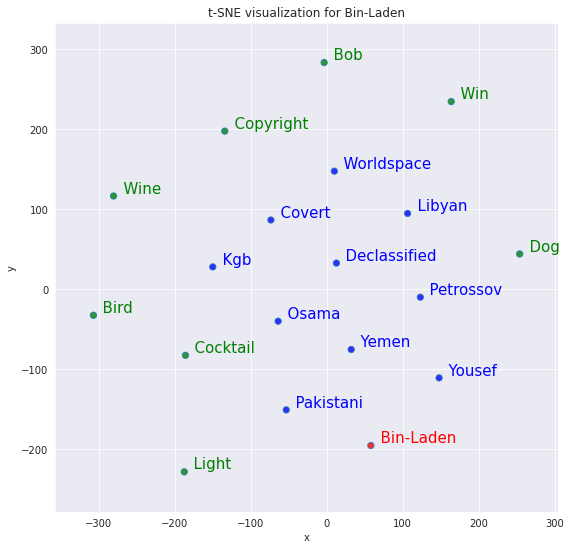

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'bin-laden', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


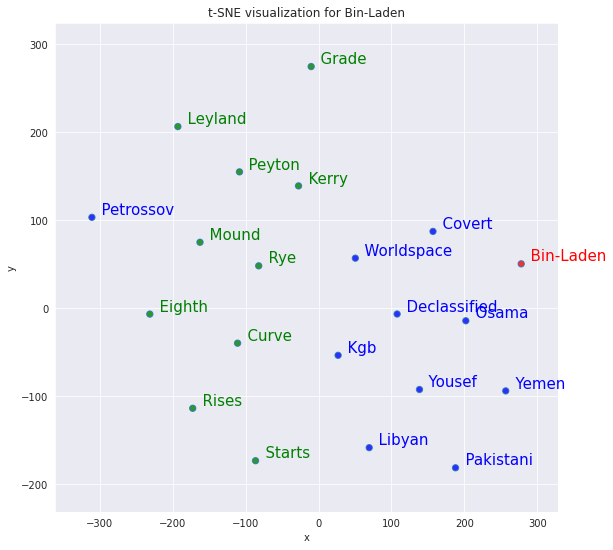

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'bin-laden', [i[0] for i in model.wv.most_similar(negative=["bin-laden"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "bin-laden", [t[0] for t in model.wv.most_similar(positive=["bin-laden"], topn=20)][10:])

### Twin-towers

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


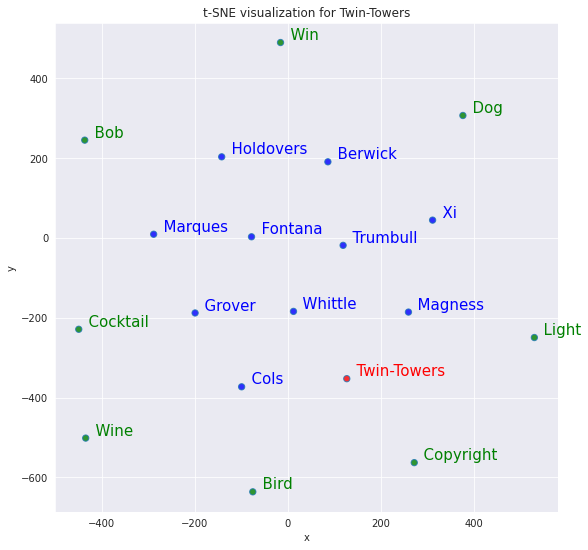

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'twin-towers', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


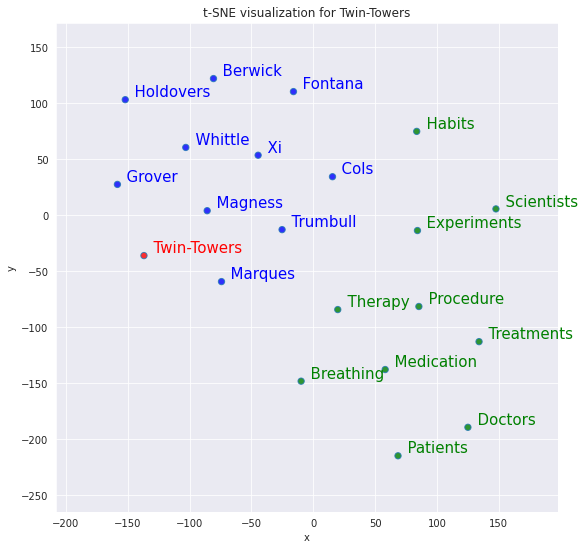

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'twin-towers', [i[0] for i in model.wv.most_similar(negative=["twin-towers"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "twin-towers", [t[0] for t in model.wv.most_similar(positive=["twin-towers"], topn=20)][10:])

### Airplane

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


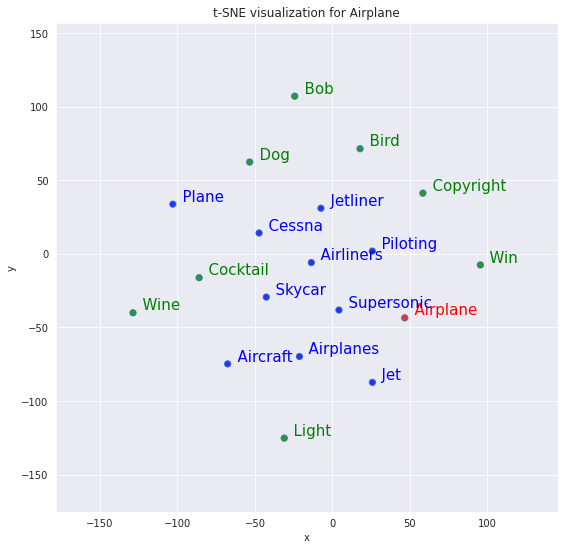

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'airplane', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


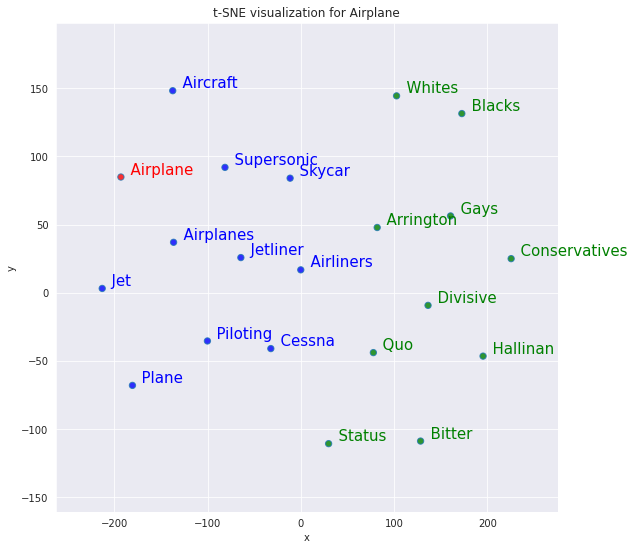

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'airplane', [i[0] for i in model.wv.most_similar(negative=["airplane"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "airplane", [t[0] for t in model.wv.most_similar(positive=["airplane"], topn=20)][10:])

### World-trade-center


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


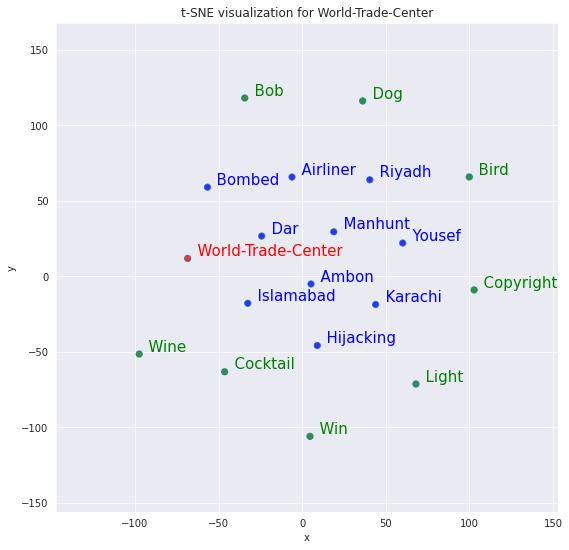

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'world-trade-center', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


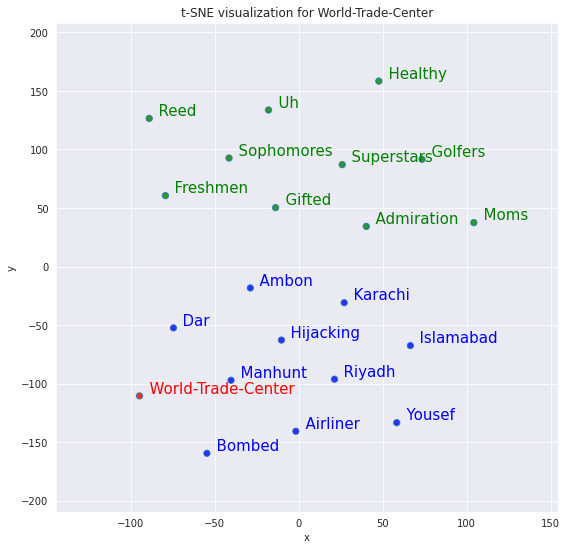

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'world-trade-center', [i[0] for i in model.wv.most_similar(negative=["world-trade-center"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "world-trade-center", [t[0] for t in model.wv.most_similar(positive=["world-trade-center"], topn=20)][10:])

### Jihad

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


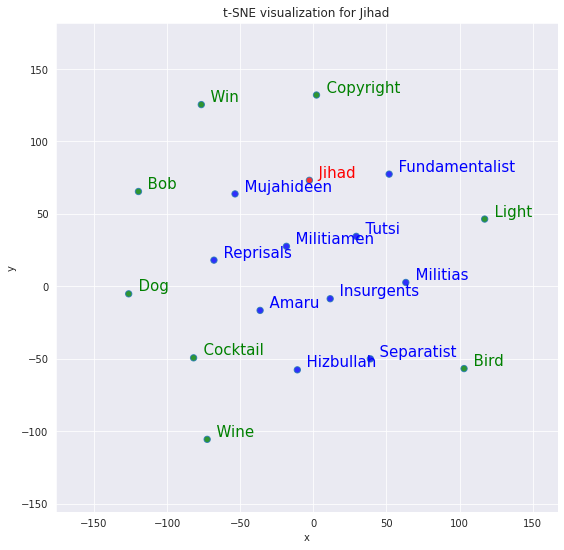

In [ ]:
# 10 most similar vs 8 random
tsnescatterplot(model, 'jihad', ['dog', 'bird', 'copyright', 'wine', 'bob', 'cocktail', 'win', 'light'])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


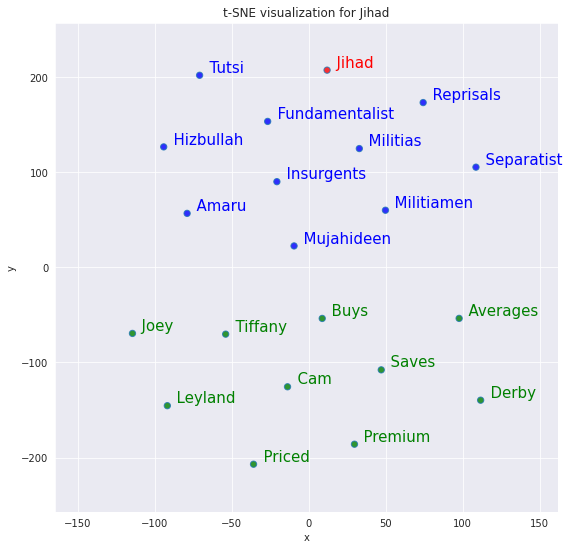

In [ ]:
# 10 most similar vs 10 most dissimilar
tsnescatterplot(model, 'jihad', [i[0] for i in model.wv.most_similar(negative=["jihad"])])

In [ ]:
# 10 Most similar words vs. 11th to 20th Most similar words
# tsnescatterplot(model, "jihad", [t[0] for t in model.wv.most_similar(positive=["jihad"], topn=20)][10:])

## Plot most similar words to a list of words

In [ ]:
keys = ['terrorism', 'twin-towers', 'airplane', 'world-trade-center'] # al-qaeda not in dictionary

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in model.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(model[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
from sklearn.manifold import TSNE
import numpy as np

embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

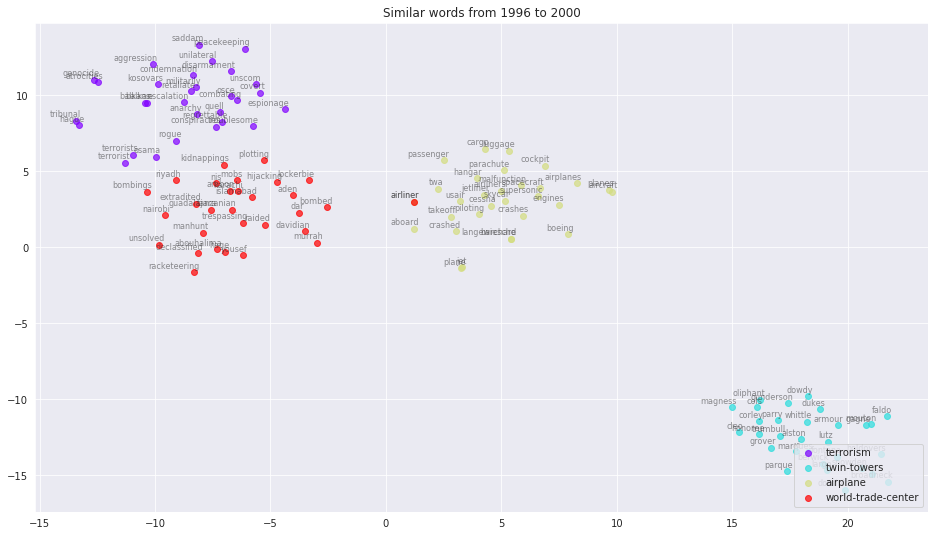

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    plt.legend(loc=4)
    plt.title(title)
    plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from 1996 to 2000', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words_pre2001.png')

# Save text file for CADE

In [ ]:
listw2v = list(support_dict.values())

with open("file9600.txt", "w") as output:
  for i in range(len(listw2v)):
    for j in range(len(listw2v[i])):
      if j == 0:
        output.write("%s" % listw2v[i][j])
      else:
        output.write(" %s" % listw2v[i][j])
    output.write("\n")

In [ ]:
# with open("bertfile9600.txt", "w") as output:
#   output.write("[CLS] ")
#   for i in range(len(listw2v)):
#     for j in range(len(listw2v[i])):
#       if j == 0:
#         output.write("%s" % listw2v[i][j])
#       else:
#         output.write(" %s" % listw2v[i][j])
#     output.write(" [SEP] ")